<a href="https://colab.research.google.com/github/kthom93/AdventOfCode2019/blob/master/Day11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Space Police

## Part 1

In [0]:
code = [3,8,1005,8,311,1106,0,11,0,0,0,104,1,104,0,3,8,1002,8,-1,10,101,1,10,10,4,10,108,0,8,10,4,10,1002,8,1,28,2,103,7,10,3,8,1002,8,-1,10,101,1,10,10,4,10,1008,8,1,10,4,10,1001,8,0,55,2,3,6,10,1,101,5,10,1,6,7,10,3,8,1002,8,-1,10,101,1,10,10,4,10,1008,8,0,10,4,10,1001,8,0,89,1,1108,11,10,2,1002,13,10,1006,0,92,1,2,13,10,3,8,102,-1,8,10,1001,10,1,10,4,10,1008,8,0,10,4,10,101,0,8,126,3,8,1002,8,-1,10,101,1,10,10,4,10,108,1,8,10,4,10,1002,8,1,147,1,7,0,10,3,8,1002,8,-1,10,1001,10,1,10,4,10,108,0,8,10,4,10,101,0,8,173,1006,0,96,3,8,102,-1,8,10,101,1,10,10,4,10,108,0,8,10,4,10,1001,8,0,198,1,3,7,10,1006,0,94,2,1003,20,10,3,8,102,-1,8,10,1001,10,1,10,4,10,1008,8,1,10,4,10,102,1,8,232,3,8,102,-1,8,10,101,1,10,10,4,10,108,1,8,10,4,10,102,1,8,253,1006,0,63,1,109,16,10,3,8,1002,8,-1,10,101,1,10,10,4,10,1008,8,1,10,4,10,101,0,8,283,2,1107,14,10,1,105,11,10,101,1,9,9,1007,9,1098,10,1005,10,15,99,109,633,104,0,104,1,21102,837951005592,1,1,21101,328,0,0,1105,1,432,21101,0,847069840276,1,21101,0,339,0,1106,0,432,3,10,104,0,104,1,3,10,104,0,104,0,3,10,104,0,104,1,3,10,104,0,104,1,3,10,104,0,104,0,3,10,104,0,104,1,21102,179318123543,1,1,21102,386,1,0,1106,0,432,21102,1,29220688067,1,21102,1,397,0,1106,0,432,3,10,104,0,104,0,3,10,104,0,104,0,21102,709580567396,1,1,21102,1,420,0,1105,1,432,21102,1,868498694912,1,21102,431,1,0,1106,0,432,99,109,2,22101,0,-1,1,21101,40,0,2,21101,0,463,3,21101,0,453,0,1105,1,496,109,-2,2106,0,0,0,1,0,0,1,109,2,3,10,204,-1,1001,458,459,474,4,0,1001,458,1,458,108,4,458,10,1006,10,490,1102,1,0,458,109,-2,2105,1,0,0,109,4,1202,-1,1,495,1207,-3,0,10,1006,10,513,21102,0,1,-3,21201,-3,0,1,21202,-2,1,2,21101,0,1,3,21101,0,532,0,1106,0,537,109,-4,2106,0,0,109,5,1207,-3,1,10,1006,10,560,2207,-4,-2,10,1006,10,560,22102,1,-4,-4,1105,1,628,21201,-4,0,1,21201,-3,-1,2,21202,-2,2,3,21101,0,579,0,1105,1,537,22101,0,1,-4,21102,1,1,-1,2207,-4,-2,10,1006,10,598,21102,1,0,-1,22202,-2,-1,-2,2107,0,-3,10,1006,10,620,22102,1,-1,1,21101,0,620,0,106,0,495,21202,-2,-1,-2,22201,-4,-2,-4,109,-5,2106,0,0]

In [0]:
import copy as cp
import matplotlib.pyplot as plt

In [0]:
size = 100
def extendCode(code):
  for _ in range(3000):
    code.append(0)
  return code

def getValue(mode, code, pos, rel):
  if mode == 0:
    return code[code[pos]]
  elif mode == 1:
    return code[pos]
  elif mode == 2:
    return code[code[pos] + rel]
  else:
    print("Unknown Mode: %i" %mode)


def readParams(params):
  modes = []
  for i in range(3):
    modes.append(params % 10)
    params = params // 10
  return modes

def writeValue(mode, code, value, pos, rel):
  if mode == 0:
    code[code[pos]] = value
  elif mode == 1:
    code[pos] = value
  elif mode == 2:
    code[code[pos] + rel] = value
  else:
    print("Unknown Mode: %i" %mode)

def intCode(code, pos=0, rel=0, inputs=[]):
  output = []
  while code[pos] != 99:
    com = code[pos] % 100
    params = code[pos] // 100
    modes = readParams(params)

    if com == 1 or com == 2:
      left = getValue(modes[0], code, pos+1, rel)
      right = getValue(modes[1], code, pos+2, rel)

      if com == 1:
        answer = left + right
      elif com == 2:
        answer = left * right
      
      writeValue(modes[2], code, answer, pos+3, rel)

      pos += 4
    
    elif com == 3:
      if len(inputs) == 0:
        return output, code, pos, rel, False
      value = inputs[0]
      inputs.remove(value)
      writeValue(modes[0], code, value, pos+1, rel)
      pos += 2
    
    elif com == 4:
      output.append(getValue(modes[0], code, pos+1, rel))
      pos += 2

    elif com == 5 or com == 6:
      value = getValue(modes[0], code, pos+1, rel)
      
      if (com == 5 and value != 0) or (com == 6 and value == 0):
        pos = getValue(modes[1], code, pos+2, rel)
      else:
        pos += 3

    elif com == 7 or com == 8:
      left = getValue(modes[0], code, pos+1, rel)
      right = getValue(modes[1], code, pos+2, rel)
      
      if (com == 7 and left < right) or (com == 8 and left == right):
        writeValue(modes[2], code, 1, pos+3, rel)
      else:
        writeValue(modes[2], code, 0, pos+3, rel)
      pos += 4
    
    elif com == 9:
      rel += getValue(modes[0], code, pos+1, rel)
      pos += 2

    else:
      print("Error")
      return None
  return output, code, rel, 0, True

def createGrid():
  grid = []
  for y in range(size):
    row = []
    for x in range(size):
      row.append(0)
    grid.append(row)
  return grid

def paint(code, starting):
  paintedPanels = set()
  grid = createGrid()
  grid[size // 2][size // 2] = starting
  robot = Robot(code)
  return robot.paint(grid)

class Robot():
  def __init__(self, code):
    self.code = code
    self.pos = 0
    self.rel = 0
    self.finished = False
    self.x = size // 2
    self.y = size // 2
    self.facing = 0
  
  def paint(self, grid):
    painted = set()

    while not self.finished:
      color = grid[self.y][self.x]
      instruction, self.code, self.pos, self.rel, self.finished = intCode(self.code, pos=self.pos, rel=self.rel, inputs=[color])
      grid[self.y][self.x] = instruction[0]
      painted.add((self.y, self.x))
      if instruction[1]:
        self.facing = (self.facing + 1) % 4
      else:
        self.facing = (self.facing - 1) % 4
      if self.facing == 0:
        self.y -= 1
      elif self.facing == 1:
        self.x += 1
      elif self.facing == 2:
        self.y += 1
      elif self.facing == 3:
        self.x -= 1

    return grid, len(painted)



def plotImage(image):
  plt.imshow(image, cmap='gray')
  plt.show()

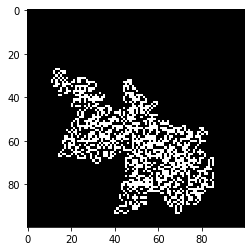

2336


In [4]:
extCode = extendCode(cp.copy(code))
grid, num = paint(extCode, 0)
plotImage(grid)
print(num)

## Part 2

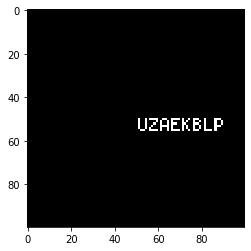

249


In [5]:
extCode = extendCode(cp.copy(code))
grid, num = paint(extCode, 1)
plotImage(grid)
print(num)